In [1]:
import re
import numpy as np
import pandas as pd
from scipy.spatial import distance
from utils import plot_function, word_amount
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%%bash
ls -l

total 27
-rw-r--r-- 1 artem 197609 2856 Jun 16 13:11 Cat.txt
-rw-r--r-- 1 artem 197609  138 Jun 16 17:07 Description.txt
-rw-r--r-- 1 artem 197609 9515 Jun 16 18:39 Task_solution.ipynb
-rw-r--r-- 1 artem 197609    3 Jun 16 18:38 result1.txt
-rw-r--r-- 1 artem 197609   20 Jun 16 18:26 result2.txt
-rw-r--r-- 1 artem 197609  858 Jun 16 18:38 utils.py
-rw-r--r-- 1 artem 197609 1158 Jun 16 18:38 utils.pyc


# TASK 1

In [3]:
FILE_NAME = 'Cat.txt'
RESULT_FILE1 = "result1.txt"
RESULT_FILE2 = "result2.txt"

In [4]:
def file_read(file_name):
    """Read text from file with filename.

    Args:
        file_name (str)

    Returns
    --------
        file_info (list): list with stripped sentences.

    """
    with open(FILE_NAME, 'r') as file_object:
        file_info = file_object.read().splitlines()
    return file_info

## 2

In [5]:
file_info = file_read(FILE_NAME)
file_text = map(str.lower, file_info)
sentence_amount = len(file_text)

## 3

In [6]:
words_lists = [filter(bool, re.split('[^a-z]', i)) for i in file_text]
words = [word for word_list in words_lists for word in word_list]

## 4

In [7]:
word_statistic = []
for sentence in words_lists:
    word_statistic.append(word_amount(sentence))

## 5

In [8]:
dataframe = pd.DataFrame(0, index = range(sentence_amount), columns=set(words))
count = 0
for sentence in word_statistic:
    for word in sentence:
        dataframe.ix[count, word] += 1
    count += 1

C:\Users\artem\AppData\Local\conda\conda\envs\Python2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


## 6

In [9]:
length = []
for idx in dataframe.index:
    length.append((idx, distance.cosine(dataframe.iloc[0], dataframe.iloc[idx])))

In [10]:
closest_distance = sorted(length, key=lambda tup: tup[1])[1: 3]
with open(RESULT_FILE1, "w") as result:
    result.write(str(closest_distance[0][0]) + " " + str(closest_distance[1][0]))

# TASK 2

$f(x) = sin(\frac{x}{5}) * exp(\frac{x}{10}) + 5 * exp(-\frac{x}{2})$

In [11]:
def f(x):
    """Function for optimization.

    Args:
        x (ndarray).

    """
    return np.sin(x/5.0) * np.exp(x / 10.0) + 5.0 * np.exp(-x/2.0)

In [12]:
X_OVERALL = np.arange(1.0, 15.0, 0.1)
Y_OVERALL = f(X_OVERALL)
DIM = 4
X = np.array([1.0, 4.0, 10.0, 15.0], dtype=np.float32)

In [13]:
X_MATRIX = np.array([X**i for i in range(4)])
y = [f(i) for i in X]
w = np.linalg.solve(X_MATRIX.T, y)

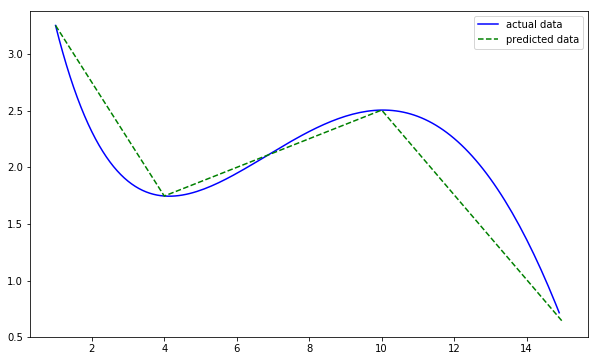

In [14]:
y_pred = X_MATRIX.T.dot(w)
plot_function(X_OVERALL, X, Y_OVERALL, y_pred)

In [15]:
w_round = map(lambda x: round(x, 2), w)
coef_to_file = map(str, w_round)

with open(RESULT_FILE2, "w") as result:
    result.writelines(" ".join(coef_to_file))